# Tarea Semanal 3:
## Magdalena Noé
Experimentacion con la cuantizacion de una señal con ruido
### Parametros destacables
- U = 1
- SNR_dB = 10
- fs_u = fs*U
- N = fs_u

- bits = 4
- vmax = np.sqrt(2)
- vref = vmax * 1.2
- q = vref / 2**(bits-1)

#### Librerias:

In [40]:
import matplotlib.pylab as plt
import numpy as np
import matplotlib.pyplot as plt #Para la visualizacion de tt y xx.
from numpy.fft import fft #Para poder escribir fft() en vez de numpy.fft.fft()

#### Parametros

In [ ]:
U = 1
SNR_dB = 10

fs = 1000
fs_u = fs*U
N = fs_u
f0 = 2
vmax = np.sqrt(2)

## Generación de la señal
Se va a utilizar una señal seno de frecuencia 2, amplitud raiz de 2, y un ruido dependiente de SNR_dB
- x : señal seno pura
- ruido : señal de ruido
- x_ruido : señal seno con ruido inducido

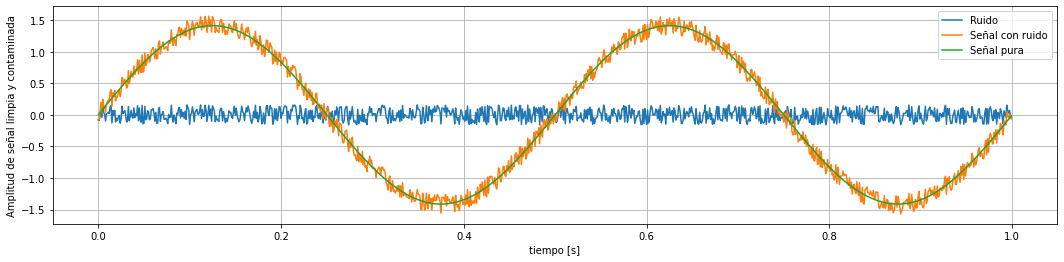

In [42]:
def mi_funcion_sen(vmax=1,dc=0,ff=1,ph=0,nn=1000,fs=1000):
    t = np.arange(nn) / fs
    sin = vmax * np.sin(t*2*np.pi*ff + ph) + dc
    return t, sin

t,x = mi_funcion_sen(fs=fs_u, nn=N, ff=f0, vmax=vmax)

theta_a = 10**(-SNR_dB/10) # Usamos Pa normalizada (=1 watt): SNRA = 10*np.log(Pa) - 10*np.log(theta_a) = 0 - 10*np.log(theta_a) 
ruido = (np.random.random_sample(size=t.shape) - 0.5) * np.sqrt(theta_a)
x_ruido = x + ruido

graficar_funcion(t, [ruido,x_ruido, x], ["Ruido","Señal con ruido","Señal pura"], "Amplitud de señal limpia y contaminada", "tiempo [s]")

## Potencia
Se realiza la FFT de las señales anteriores y pasa a decibeles. Para ello se utiliza la funcion desarrollada potencia_dB().
Se podrá apreciar el ruido innerente a la señal seno pura.

In [46]:
def potencia_dB(XX, N):
    f = np.arange(N//2)
    pot_XX = 2*np.abs(XX[:N//2])**2
    pot_XX_dB = 10*np.log10(pot_XX)

    return pot_XX_dB, f

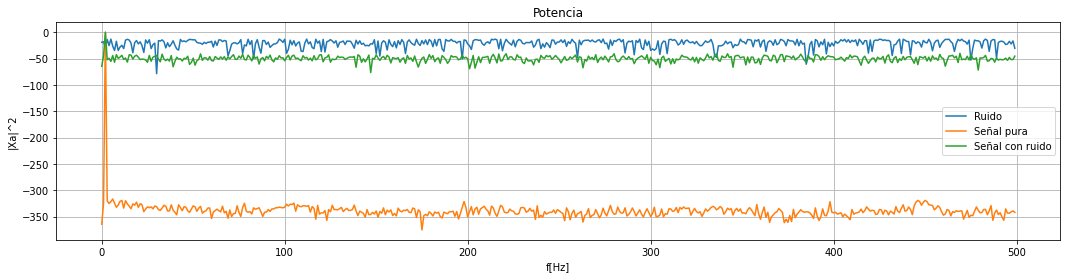

In [47]:
x_FFT = fft(x) * 1/N 
x_ruido_FFT = fft(x_ruido) * 1/N
ruido_FFT = fft(ruido) * 1/N

pot_x, frec = potencia_dB(x_FFT, N)
pot_xruido, frec = potencia_dB(x_ruido_FFT, N)
pot_ruido, frec = potencia_dB(ruido, N)

graficar_funcion(frec, [pot_ruido, pot_x, pot_xruido], ["Ruido", "Señal pura", "Señal con ruido"], "|Xa|^2", "f[Hz]", "Potencia")

## Cuantización de la señal
Vamos a estar cuantizando la señal con el parametro q, calculado a partir de los bits de cuantizacion y una Vref que sera 20% mayor a la Vmax de la señal a cuantizar, con un margen del 10% superior e inferior.

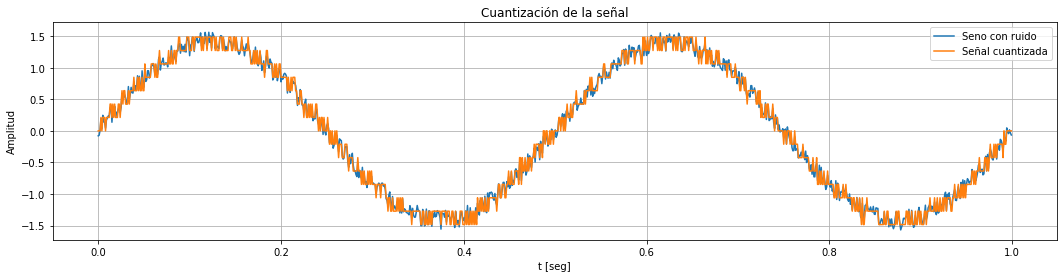

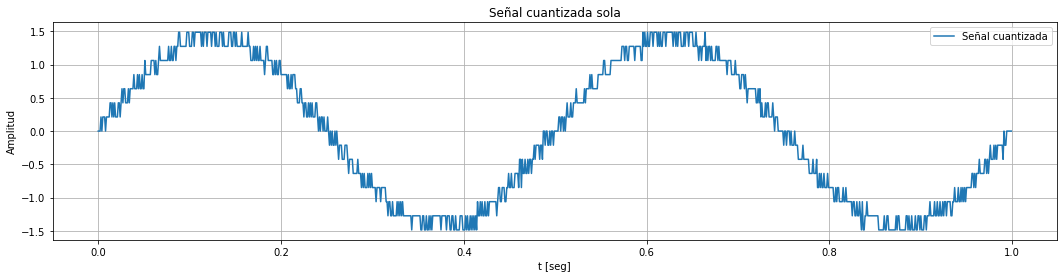

In [ ]:
bits = 4
vref = vmax * 1.2
q = vref / 2**(bits-1)

piso_ruido = q**2 / 12
piso_ruido = 10*np.log(piso_ruido)
x_cuant = np.round(x_ruido / q) * q # Cuantificamos la señal

graficar_funcion(t, [x_ruido, x_cuant], ["Seno con ruido","Señal cuantizada"], "Amplitud", "t [seg]", "Cuantización de la señal")
graficar_funcion(t, [x_cuant], ["Señal cuantizada"], "Amplitud", "t [seg]", "Señal cuantizada sola")


## Buscamos nq
¿Que es nq? El ruido introducido al cuantizar la señal

In [54]:
nq = x_cuant - x_ruido
graficar_funcion(t, [nq, fft(nq)], ["nq, FFT nq"], "Amplitud", "va de -q/2 a q/2", "Potencia", piso_ruido=(1/q))

IndexError: invalid index to scalar variable.

<Figure size 1296x288 with 0 Axes>

#### graficar_funcion()

In [ ]:
def graficar_funcion(abs,ord,leg,label_y="",label_x="",titulo="",piso_ruido=0):
    plt.figure(figsize=(18, 4))
    if(piso_ruido):
        color = ["green","red","yellow","blue","black"]
        #piso_ruido = 10*np.log(piso_ruido)
        for k in np.arange(len(ord)):
            plt.axhline(piso_ruido[k], color=color[k%len(color)], linestyle='--', label="Piso de ruido")
        
    for k in np.arange(len(ord)):
        plt.plot(abs, ord[k], label=leg[k])
    
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(titulo)
    plt.grid()
    plt.axis('tight')
    plt.legend()
    plt.show()
    return